<a href="https://colab.research.google.com/github/ethanewing1/nyc_condos/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYZING TRENDS IN THE NEW YORK REAL ESTATE MARKET
Ethan Ewing, Rebecca Shamus, Ani Bhaskara
Fall 2022

**MOTIVATION**

We will be taking a look at trends in the New York city housing market over time. This includes data about the net income, efficency, and market value of different properties in different areas of the city. The current state of the housing market has seen soaring prices and our group wanted to take a closer look at how the data is predicted to change.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Collecting Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

Here, we loaded in our data set using pandas and sorted it by year and Estimated Gross income.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cmsc320final/Condominium_Comparable_Rental_Income_in_NYC.csv')

df = df.sort_values(by='Estimated Gross Income', ascending=False)
df = df[:1000]
df = df.sort_values(by='Report Year', ascending=True)

df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
11,1-00016-7508,200 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,546,1987.0,586224,20136794,5229118.0,14907676,112553026.0,2012
714,1-01049-7501,1 CENTRAL PARK,MIDTOWN WEST,R4-CONDOMINIUM,165,1955.0,377444,15750738,4174531.0,11576207,87401005.0,2012
85,1-00142-7502,200 CHAMBERS STREET,TRIBECA,R4-CONDOMINIUM,311,2005.0,314373,13958161,3964244.0,9993917,75454001.0,2012
673,1-00936-7501,333 EAST 30 STREET,KIPS BAY,R4-CONDOMINIUM,1121,1962.0,1171064,31794388,11359321.0,20435067,154284996.0,2012
27,1-00027-7502,20 EXCHANGE PLACE,FINANCIAL,RR-CONDOMINIUM,350,1929.0,346789,13890120,3648220.0,10241900,80272000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
19581,1-01331-7502,225 EAST 57 STREET,MIDTOWN EAST,R9 -CONDOPS,260,1964.0,305093,15474317,5879142.0,9595175,77918000.0,2019
19474,1-00890-7501,155 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,330,1961.0,270870,12934043,3811141.0,9122902,74091990.0,2019
20214,2-03929-7501,1469 WEST AVENUE,PARKCHESTER,R4 -ELEVATOR,2121,1933.0,1867373,27973248,15797976.0,12175272,86159983.0,2019
20191,1-01307-7502,100 EAST 53 STREET,MIDTOWN CBD,R4 -ELEVATOR,94,2014.0,294885,16575486,5470117.0,11105369,90192005.0,2019


We decided to first analyze the efficiency of each rental property. This will tell us the expenses/revenue as a percentage. The percentage indicates how much is spent for every dollar. For example an efficiency of .75 indicates that 75 cents is spent for every dollar grossed. Lower efficiencies indicate that a property generates a poorer return for the owner, which is why we find this indicator important. For example, if we found a trend of low efficiency in a particular neighborhood over time, we could assume that the housing market was doing poorly in that location.

Since revenue is already calculated as Net Operating Income, we used it to calculate the efficiency. We iterated through the dataset again to divide the Estimated Expense column by our Net Operating Income Column, and then added this new column to the dataset.


# Plotting Data

In [ ]:
eff = []
for i, rows in df.iterrows():
  eff.append(rows['Estimated Expense'] / rows['Net Operating Income'])

df['Efficiency'] = eff
df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Efficiency
11,1-00016-7508,200 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,546,1987.0,586224,20136794,5229118.0,14907676,112553026.0,2012,0.350767
714,1-01049-7501,1 CENTRAL PARK,MIDTOWN WEST,R4-CONDOMINIUM,165,1955.0,377444,15750738,4174531.0,11576207,87401005.0,2012,0.360613
85,1-00142-7502,200 CHAMBERS STREET,TRIBECA,R4-CONDOMINIUM,311,2005.0,314373,13958161,3964244.0,9993917,75454001.0,2012,0.396666
673,1-00936-7501,333 EAST 30 STREET,KIPS BAY,R4-CONDOMINIUM,1121,1962.0,1171064,31794388,11359321.0,20435067,154284996.0,2012,0.555874
27,1-00027-7502,20 EXCHANGE PLACE,FINANCIAL,RR-CONDOMINIUM,350,1929.0,346789,13890120,3648220.0,10241900,80272000.0,2012,0.356205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19581,1-01331-7502,225 EAST 57 STREET,MIDTOWN EAST,R9 -CONDOPS,260,1964.0,305093,15474317,5879142.0,9595175,77918000.0,2019,0.612719
19474,1-00890-7501,155 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,330,1961.0,270870,12934043,3811141.0,9122902,74091990.0,2019,0.417755
20214,2-03929-7501,1469 WEST AVENUE,PARKCHESTER,R4 -ELEVATOR,2121,1933.0,1867373,27973248,15797976.0,12175272,86159983.0,2019,1.297546
20191,1-01307-7502,100 EAST 53 STREET,MIDTOWN CBD,R4 -ELEVATOR,94,2014.0,294885,16575486,5470117.0,11105369,90192005.0,2019,0.492565


Next we wanted to look at the best neighborhoods for rental properties over time, based on efficiency. We first created a scatter plot with seaborn lmplot that demonstrated the efficiency over time by neighborhood. Next, we created a scatter plot with a regression line, using regplot, for each neighborhood with over 15 data points. Since the data is already sorted by Net Operating Income, this gave us the top neighborhoods with the highest Net Operating Income.

The results of each graph told us that each neighborhood saw an upward trend in efficiency, besides Clinton. The Financial District proved to have the highest efficiency. Which indicates that the Financial district may be the most desirable location for investing in real estate.

In [ ]:
neighborhood = []
for i in df['Neighborhood'].unique():
  if len(df[df.Neighborhood == i]) > 15:
    neighborhood.append(i)

<function matplotlib.pyplot.show(*args, **kw)>

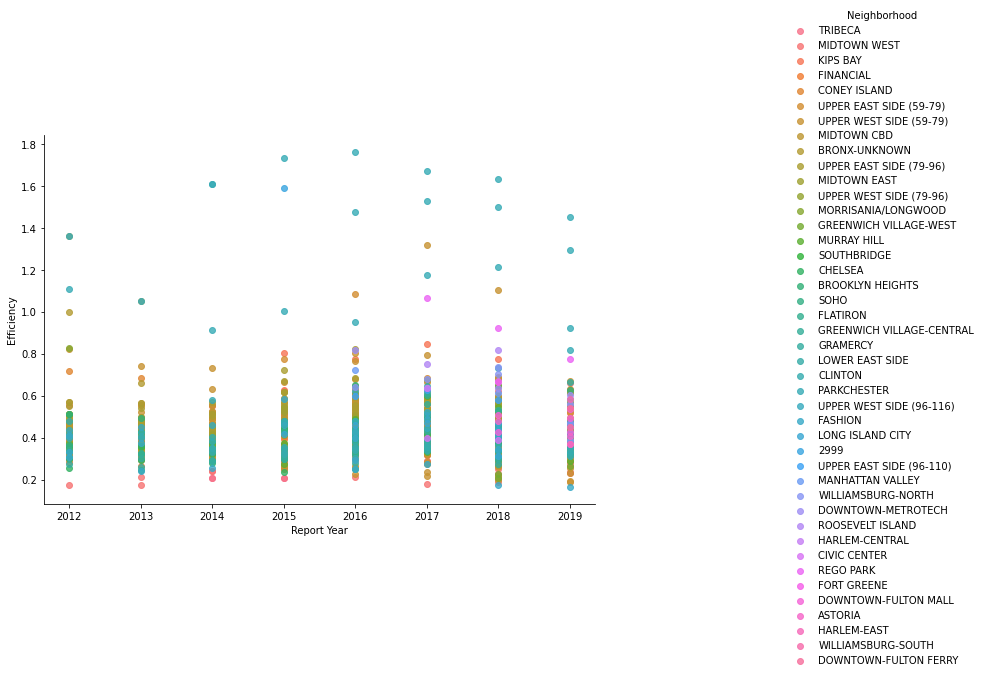

In [ ]:
sns.lmplot(data=df, x = 'Report Year', y = 'Efficiency', hue = 'Neighborhood', fit_reg=False) 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 6)
plt.show

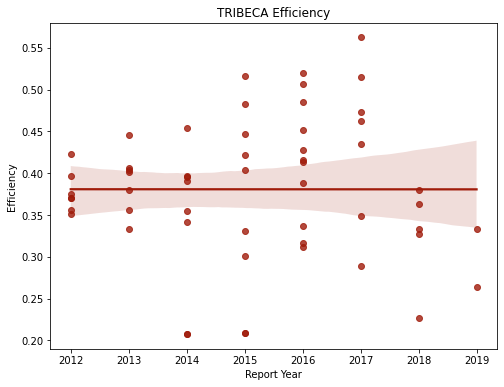

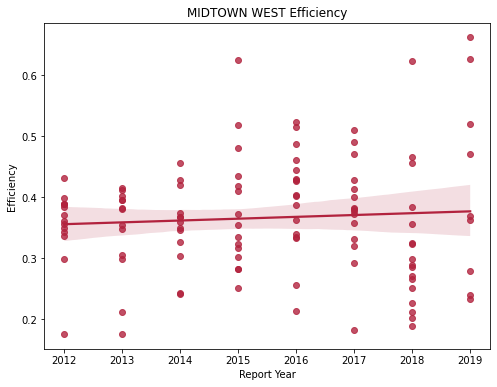

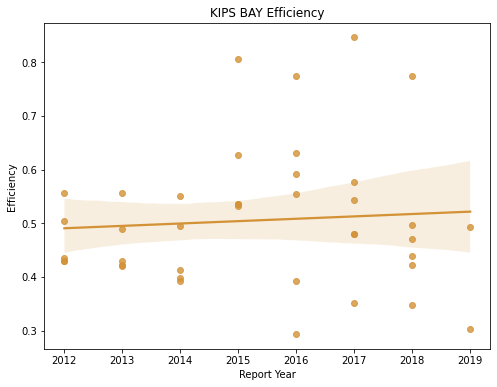

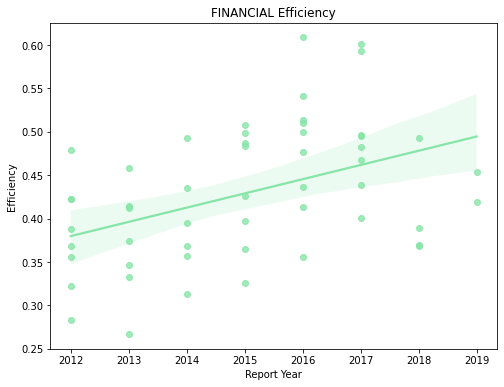

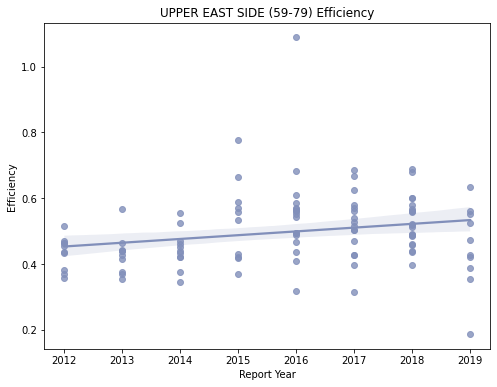

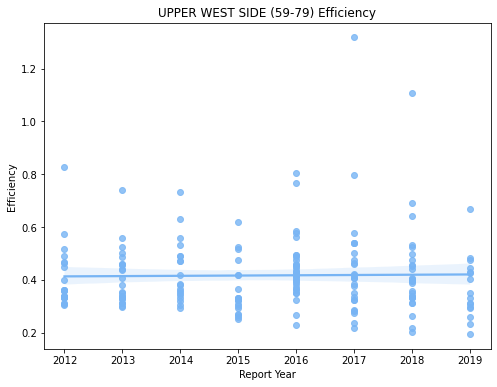

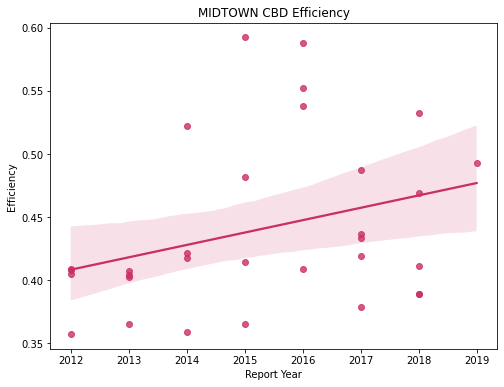

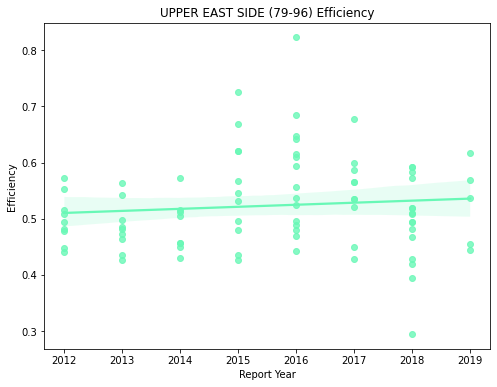

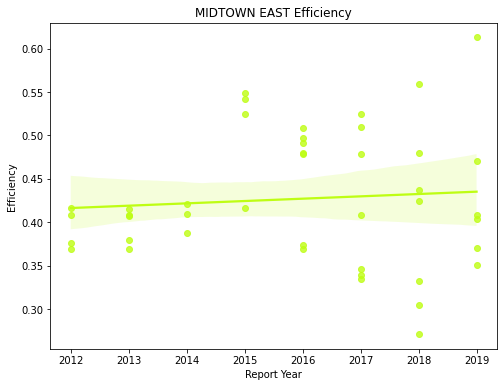

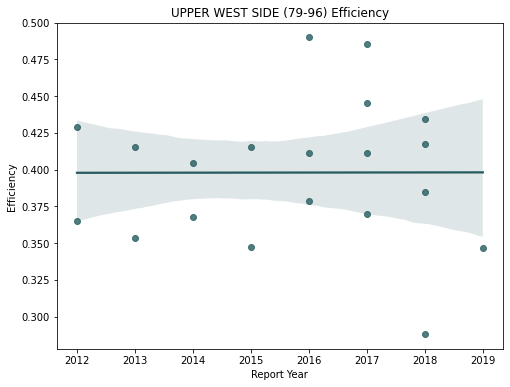

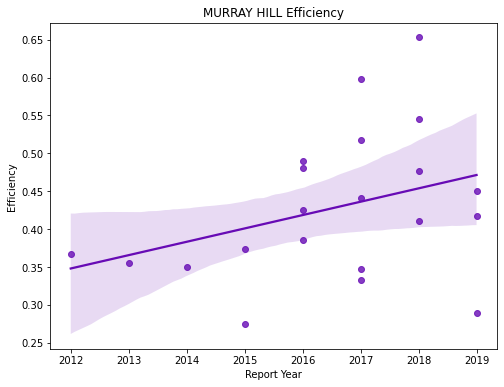

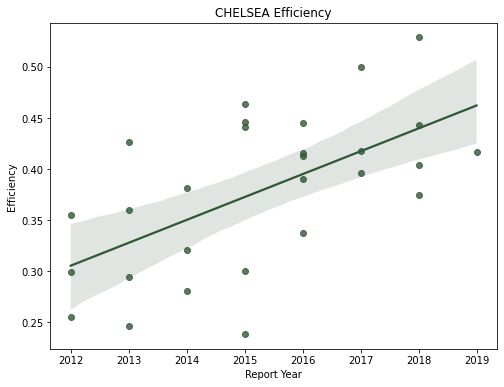

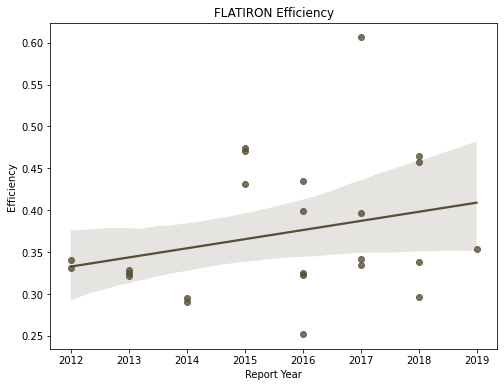

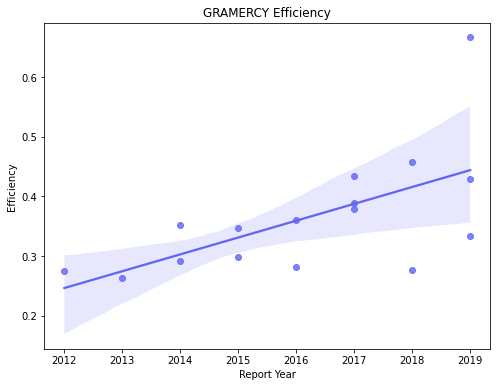

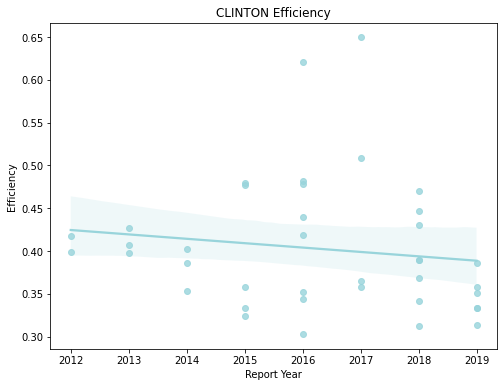

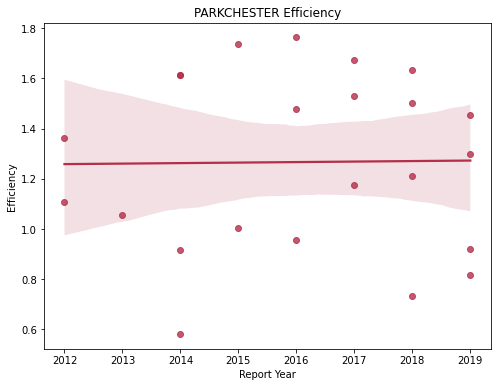

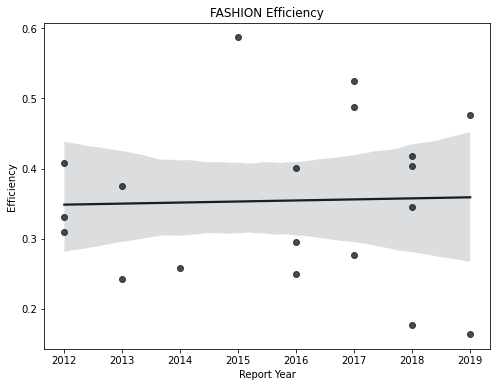

In [ ]:
for i in neighborhood:
  n = df.loc[df['Neighborhood'] == i]
  plt.figure(figsize = (8, 6))
  sns.regplot(data=n, x = 'Report Year', y = 'Efficiency', color = np.random.rand(3,)) 
  plt.title(i + " Efficiency")

What’s considered good efficiency, net operating income, and full market value? To determine the best real estate investments, we wanted to take a look at the mean values for these categories in respect to time.
We created a new dataframe and used the .mean() function to find the averages of these factors. We then used the seaborn barplot to plot each average per year into three different graphs

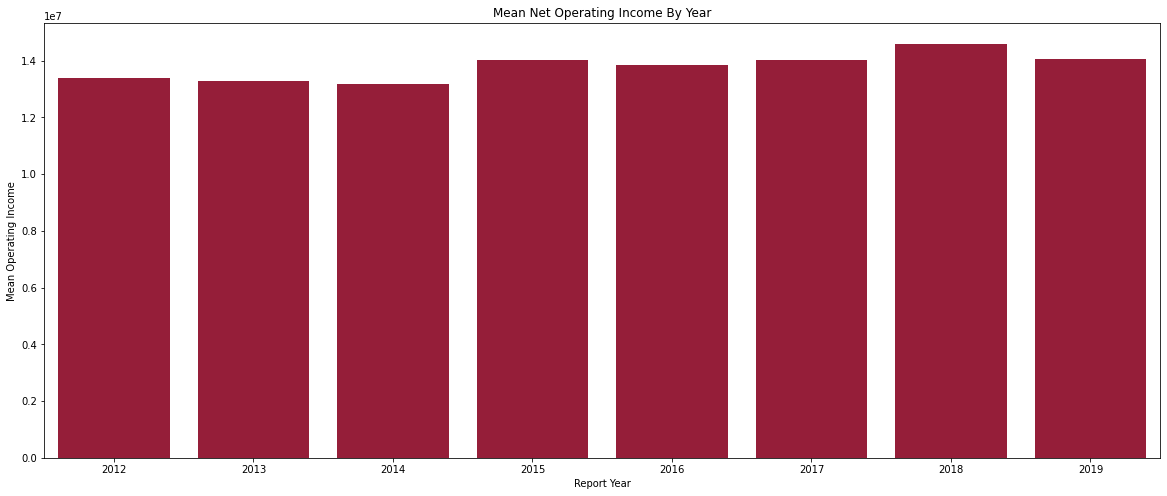

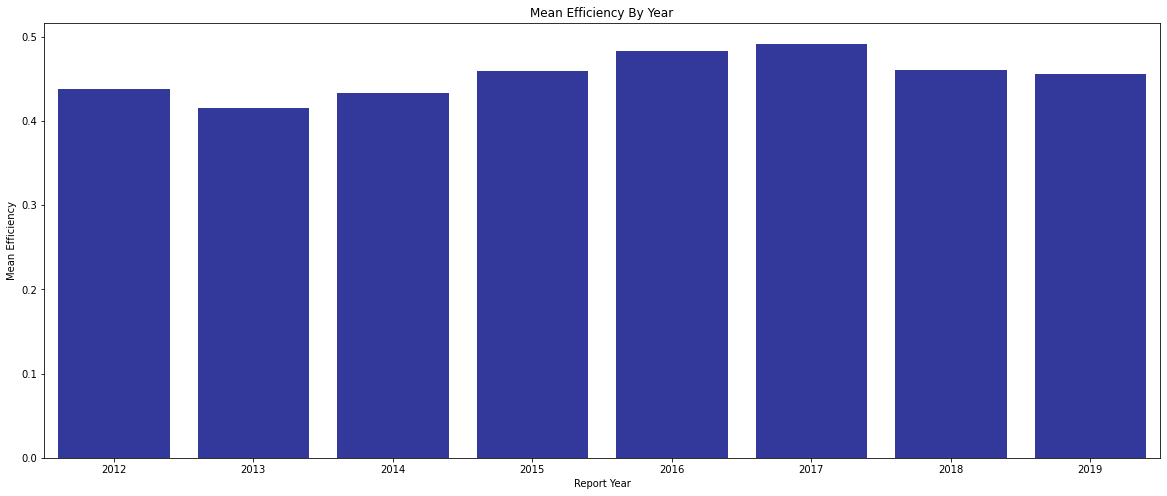

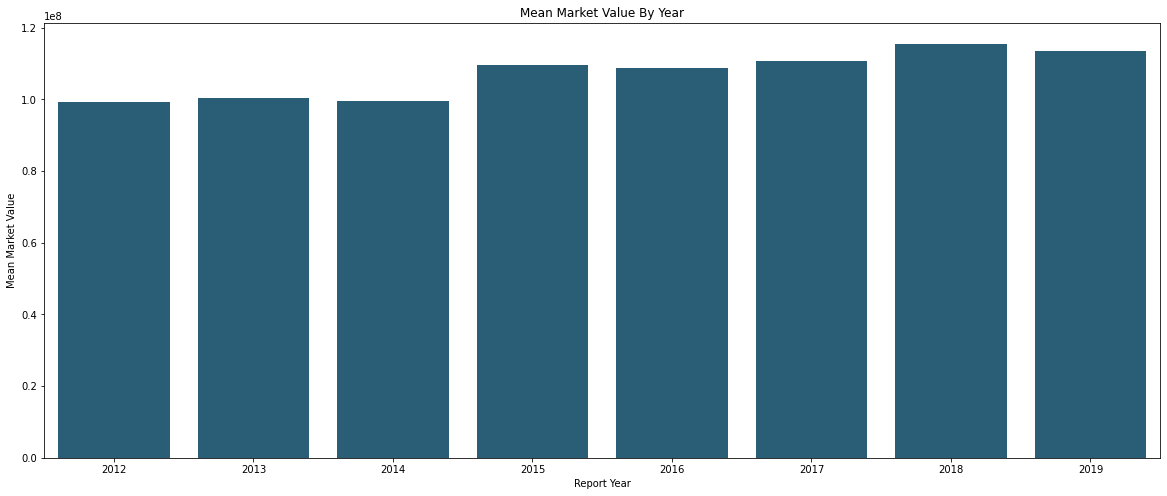

In [ ]:
means = pd.DataFrame()
rep_year = []
avg_net_income = []
avg_efficency = []
avg_market_val = []

for i in range(0,8):
    rep_year.append(i + 2012)
    avg_net_income.append(df.loc[df['Report Year'] == (i + 2012), 'Net Operating Income'].mean())
    avg_efficency.append(df.loc[df['Report Year'] == (i + 2012), 'Efficiency'].mean())
    avg_market_val.append(df.loc[df['Report Year'] == (i + 2012), 'Full Market Value'].mean())



means['Report Year'] = rep_year
means['Mean Operating Income'] = avg_net_income
means['Mean Efficiency'] = avg_efficency
means['Mean Market Value'] = avg_market_val

sns.barplot(x='Report Year', y='Mean Operating Income', data=means, color = np.random.rand(3,))
plt.title("Mean Net Operating Income By Year")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

plt.title("Mean Efficiency By Year")
sns.barplot(x='Report Year', y='Mean Efficiency', data=means, color = np.random.rand(3,))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

sns.barplot(x='Report Year', y='Mean Market Value', data=means, color = np.random.rand(3,))
plt.title("Mean Market Value By Year")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

We also wanted to take a look at how properties were distributed around the mean. To do this we created a metric for properties, given that the mean was about .45 for efficiency, we created a new column called rank. Each property would be given a value of 0, 1, or 2 based on how they fell around the mean. Properties with low efficiency were given a score of 0, median efficiencies were given a score of 1, and high efficiencies were given a score of 2. We then created a count plot with seaborn, that demonstrated to us that most properties had a low efficiency.

In [ ]:
rank = []
for i, rows in df.iterrows():
  if rows['Efficiency'] < 0.4:
    rank.append(0)
  elif rows['Efficiency'] > 0.5:
    rank.append(2)
  else:
    rank.append(1)

df['rank'] = rank

sns.countplot(rank)
plt.title("Low Median and High Efficiencies")
plt.ylabel("Total number of Efficiencies")
plt.xlabel("Outcome")

Here we wanted to break down these three factors again by neighborhood, rather than time, we replicated the process above and created three more bar graphs. We can see that neighborhoods such as Panchester performed well in all three bargraphs, which indicated that it may be a good investment.

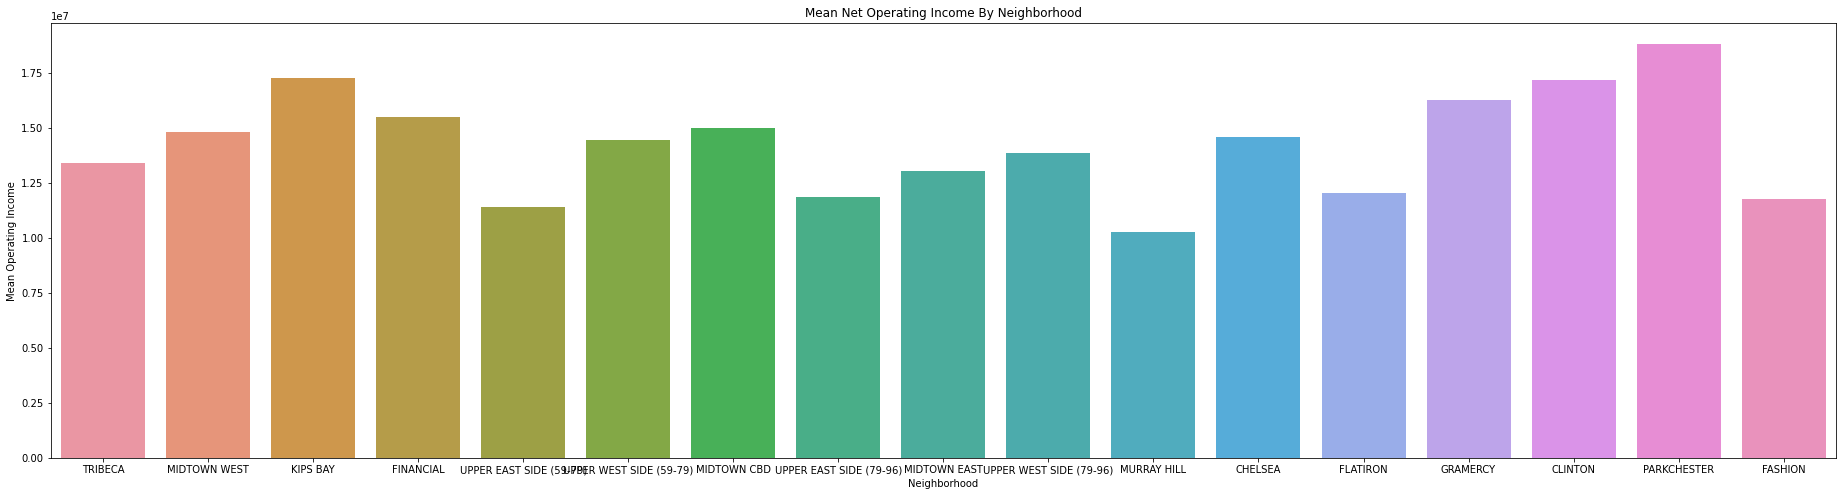

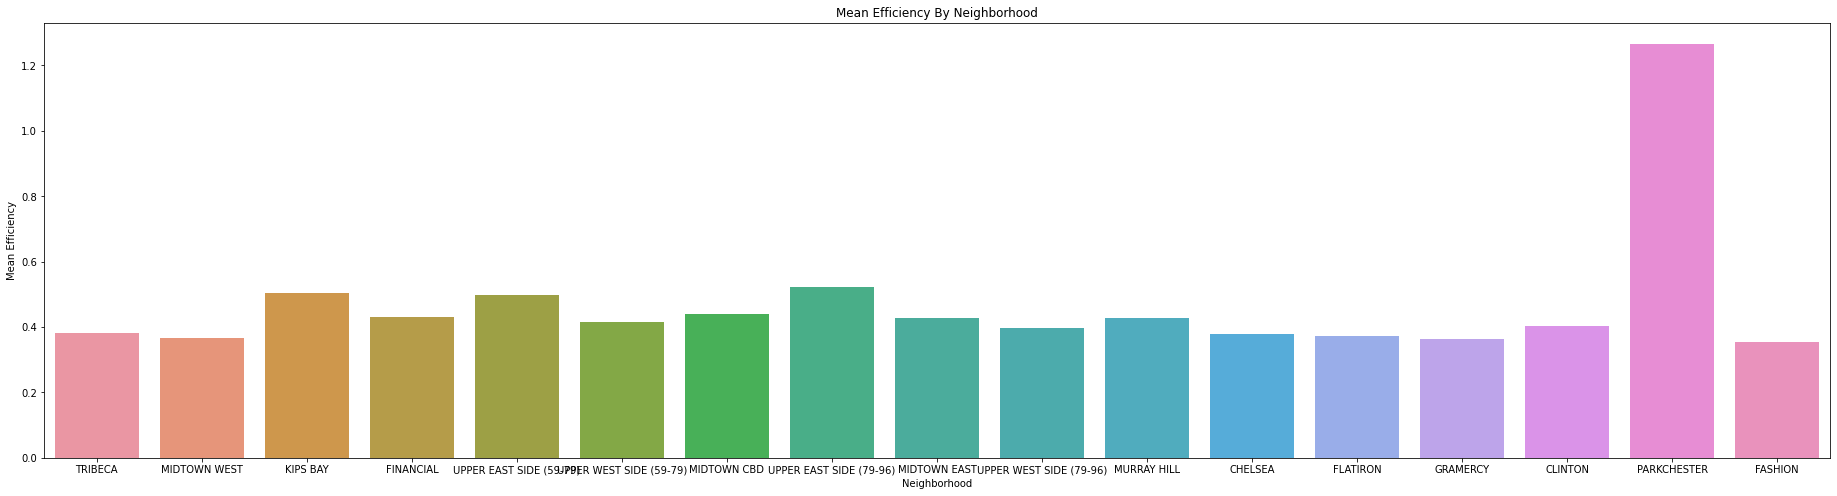

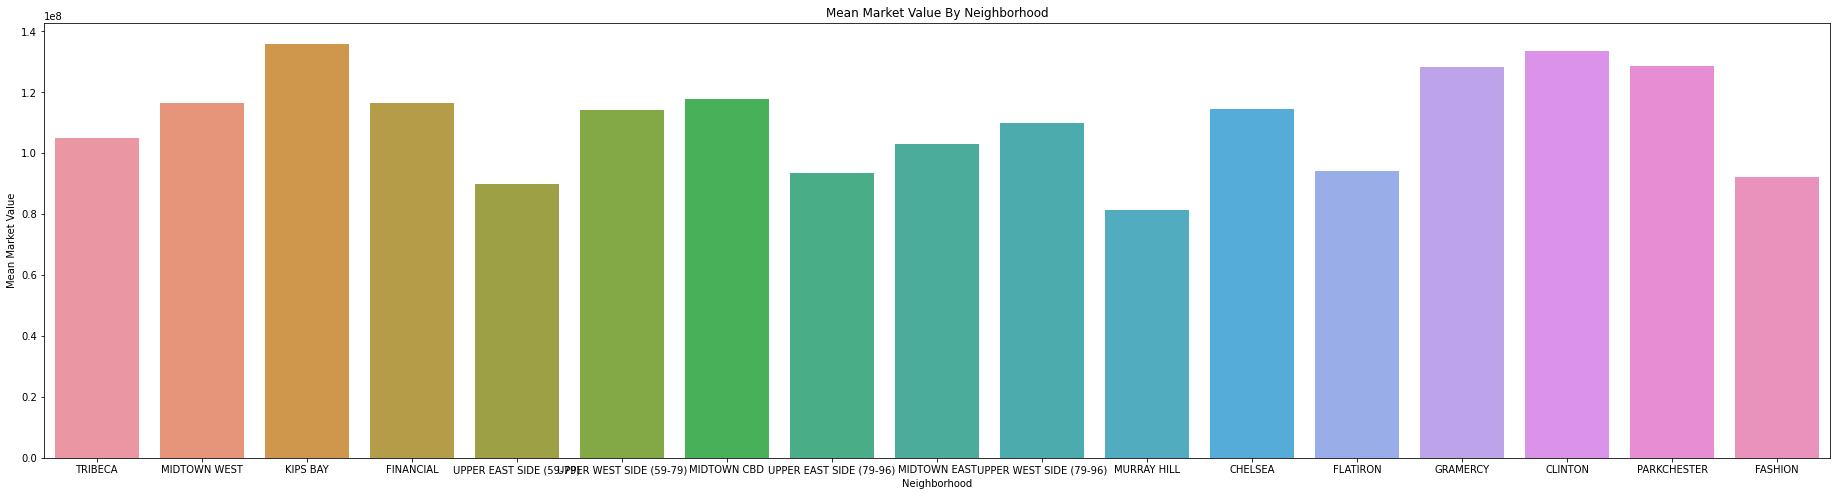

In [ ]:
nmeans = pd.DataFrame()
n = []
avg_net_income = []
avg_efficency = []
avg_market_val = []

for i in neighborhood:
    n.append(i)
    avg_net_income.append(df.loc[df['Neighborhood'] == i, 'Net Operating Income'].mean())
    avg_efficency.append(df.loc[df['Neighborhood'] == i, 'Efficiency'].mean())
    avg_market_val.append(df.loc[df['Neighborhood'] == i, 'Full Market Value'].mean())

nmeans['Neighborhood'] = n
nmeans['Mean Operating Income'] = avg_net_income
nmeans['Mean Efficiency'] = avg_efficency
nmeans['Mean Market Value'] = avg_market_val

sns.barplot(x='Neighborhood', y='Mean Operating Income', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Net Operating Income By Neighborhood")
plt.show()

print()

sns.barplot(x='Neighborhood', y='Mean Efficiency', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Efficiency By Neighborhood")
plt.show()

print()

sns.barplot(x='Neighborhood', y='Mean Market Value', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Market Value By Neighborhood")
plt.show()


Finally, we wanted to see how the data correlated to each other, we passed in df.corr() into a seaborn heatmap, which demonstrated to us the correlation of the integer and float values of the dataset. We were surprised to see that net operating income and report year had a very poor correlation, of about 0.1. We guessed that net operating income increased each year but that would show a high correlation. We see now that the two factors are independent of each other. We were also surprised that the year a property was built had little to no correlation to any of the factors including estimated expense and estimated gross income. Categories with high positive correlation included estimated expense, estimated income, and gross square feet. This makes sense as property values change based on these factors.

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".1f")
sns.set(rc={'figure.figsize':(10,10)})

# Linear Regression

 The next step in our process was linear regression. The purpose of using linear regression in our project was to predict how the housing market may perform in the future based on different factors, such as efficiency and net operating income. To create our first model, we used numpy to create and reshape arrays from our dataframe columns about the report year and net operating income, to create a prediction of net operating income over time. We then dropped NaN (null) values, are they are unusable, and performed the train_test_split from sklearn. To perform linear regression we chose to import this package, along with the Linear Regression one. We proceeded to fit the test and predict and use the Linear Regression package to predict outcomes. To display these outcomes, we plotted our actual data using a scatter plot, then used a linear regression line to plot the predicted linear regression line.


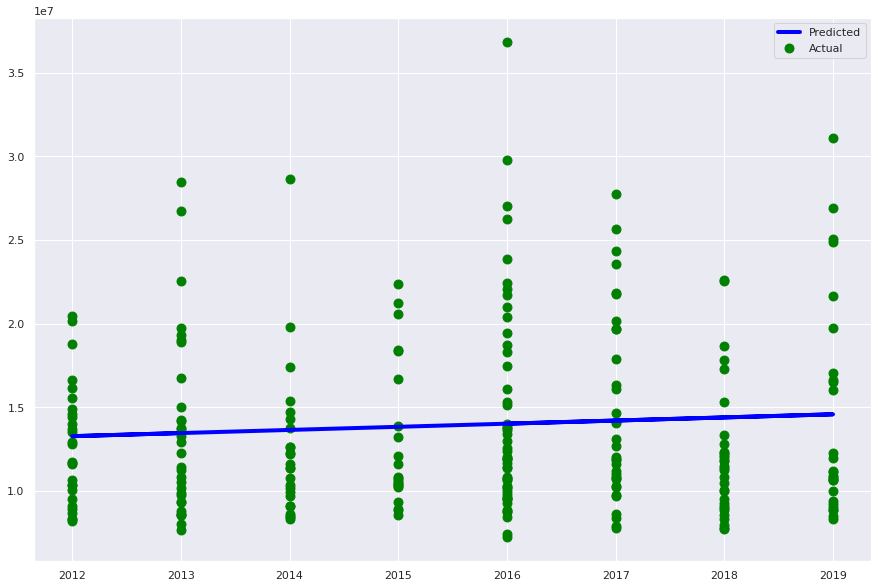

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

X = np.array(df['Report Year']).reshape(-1, 1)
y = np.array(df['Net Operating Income']).reshape(-1, 1)

df.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

r = LinearRegression().fit(X_train, y_train)

y_pred = r.predict(X_test)

f, ax = plt.subplots(figsize=(13,10))

plt.scatter(X_test, y_test, color = "green", label = "Actual", s=80)
plt.plot(X_test, y_pred, color = "blue", label = "Predicted", linewidth=4)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)

ax.legend()
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


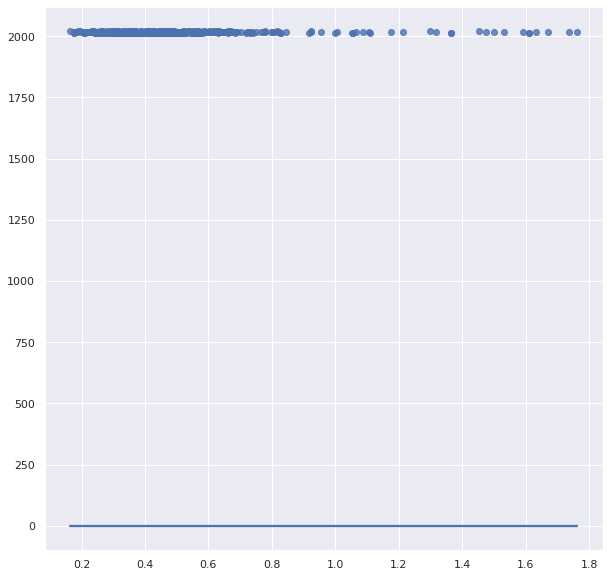

In [ ]:
from sklearn import linear_model
X = np.array(df['Efficiency']).reshape(-1, 1)
y = np.array(df['Report Year']).reshape(-1, 1)

reg = linear_model.LogisticRegression()

reg.fit(X,y)

predicted = reg.predict(np.array(df['Efficiency'].mean()).reshape(-1,1))

sns.regplot(x=X, y=y, data=df, logistic=True, ci=None)

**HOW DATA CORRELATES TO EACH OTHER**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df2 = pd.DataFrame()
df2['year'] = df['Report Year']
df2['income'] = df['Net Operating Income']
df2['area'] = df['Neighborhood']

results = smf.ols(formula='income ~ year * area', data=df2).fit()

results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     2.948
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.14e-14
Time:                        02:49:46   Log-Likelihood:                -16840.
No. Observations:                 998   AIC:                         3.384e+04
Df Residuals:                     918   BIC:                         3.423e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -9.478e+08   1.07e+09     -0.887      0.375   -3.04e+09    1.15e+09
area[T.ASTORIA]                          8.79e+08    1.5e+10      0.059      0.953   -2.85e+10    3.02e+10
area[T.BRONX-UNKNOWN]                  -4.451e+09   1.06e+10     -0.421      0.674   -2.52e+10    1.63e+10
area[T.BROOKLYN HEIGHTS]               -5.477e+08    2.2e+09     -0.249      0.803   -4.86e+09    3.77e+09
area[T.CHELSEA]                         1.273e+09   1.46e+09      0.874      0.382   -1.59e+09    4.13e+09
area[T.CIVIC CENTER]                   -1.183e+09    1.5e+10     -0.079      0.937   -3.05e+10    2.82e+10
area[T.CLINTON]                        -2.174e+09   1.35e+09     -1.611      0.108   -4.82e+09    4.74e+08
area[T.CONEY ISLAND]                    1.787e+09   1.49e+10      0.120      0.905   -2.75e+10    3.11e+10
area[T.DOWNTOWN-FULTON FERRY]             -0.0898      1.771     -0.051      0.960      -3.565       3.385
area[T.DOWNTOWN-FULTON MALL]            -3.62e+09   1.06e+10     -0.341      0.733   -2.44e+10    1.72e+10
area[T.DOWNTOWN-METROTECH]             -4.422e+08   4.44e+09     -0.100      0.921   -9.15e+09    8.27e+09
area[T.FASHION]                         1.699e+08   1.48e+09      0.115      0.908   -2.73e+09    3.07e+09
area[T.FINANCIAL]                      -1.047e+09    1.3e+09     -0.807      0.420   -3.59e+09     1.5e+09
area[T.FLATIRON]                       -7.413e+07   1.52e+09     -0.049      0.961   -3.05e+09     2.9e+09
area[T.FORT GREENE]                     3.265e+09    1.3e+10      0.252      0.801   -2.22e+10    2.87e+10
area[T.GRAMERCY]                        1.582e+09   1.64e+09      0.968      0.333   -1.63e+09    4.79e+09
area[T.GREENWICH VILLAGE-CENTRAL]       1.373e+09   1.85e+09      0.743      0.457   -2.25e+09       5e+09
area[T.GREENWICH VILLAGE-WEST]         -4.057e+09    1.8e+09     -2.254      0.024   -7.59e+09   -5.24e+08
area[T.HARLEM-CENTRAL]                 -1.925e+08    1.5e+10     -0.013      0.990   -2.95e+10    2.92e+10
area[T.HARLEM-EAST]                       -0.7072      2.003     -0.353      0.724      -4.638       3.223
area[T.KIPS BAY]                        7.893e+08   1.32e+09      0.596      0.551   -1.81e+09    3.39e+09
area[T.LONG ISLAND CITY]                 2.53e+09   2.73e+09      0.926      0.355   -2.83e+09    7.89e+09
area[T.LOWER EAST SIDE]                -6.554e+09   2.43e+09     -2.692      0.007   -1.13e+10   -1.78e+09
area[T.MANHATTAN VALLEY]                 4.98e+08   7.53e+09      0.066      0.947   -1.43e+10    1.53e+10
area[T.MIDTOWN CBD]                    -5.335e+08   1.39e+09     -0.383      0.702   -3.27e+09     2.2e+09
area[T.MIDTOWN EAST]                    1.893e+09   1.29e+09      1.469      0.142   -6

# Hypothesis Test

For our hypothesis test, we are using a One Way F-test. We chose this type of hypothesis test because we want to know if our neighborhoods share similar efficenies. In the execution of our hypthesis test, each neighborhood is a group and their mean efficency is the metric we are using to test their similarity. 
To create the hypothesis, we used the one hot encoding technique to create three columns. Each column contains a value of true or false based on the efficency. The median value 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

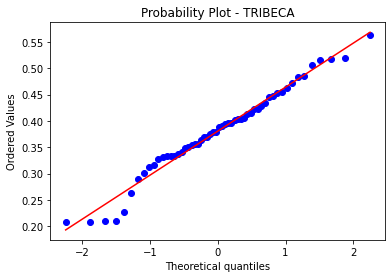

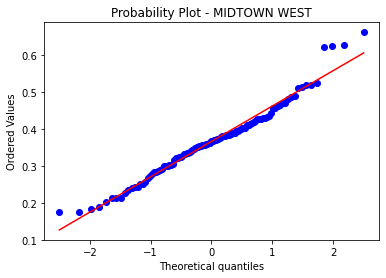

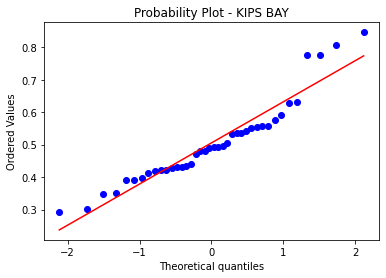

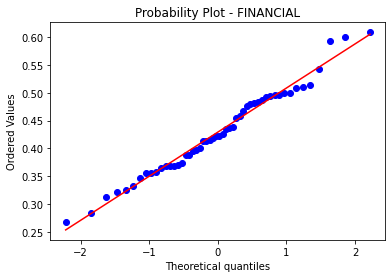

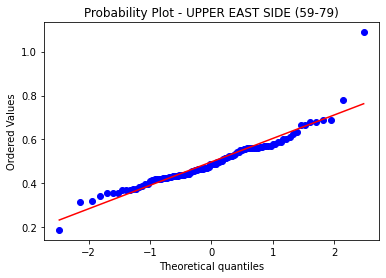

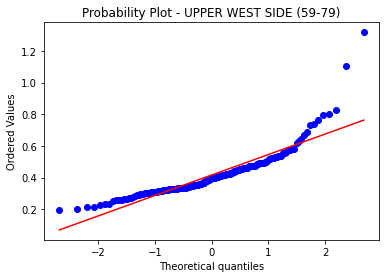

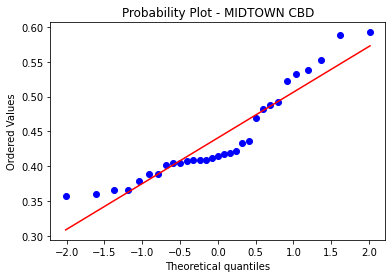

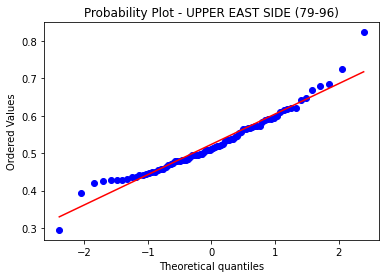

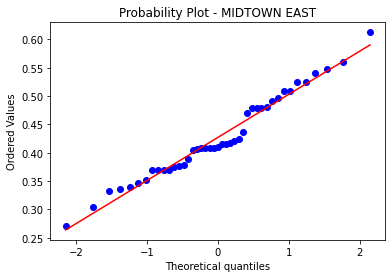

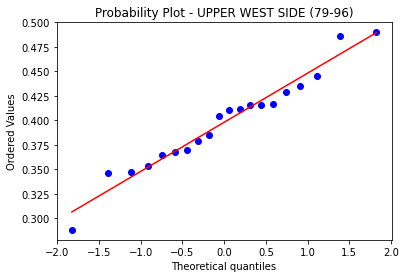

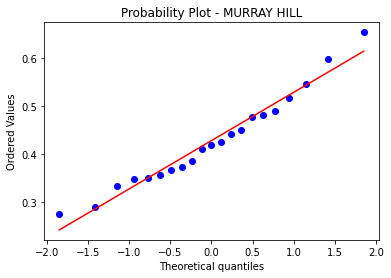

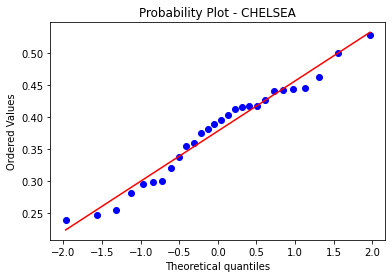

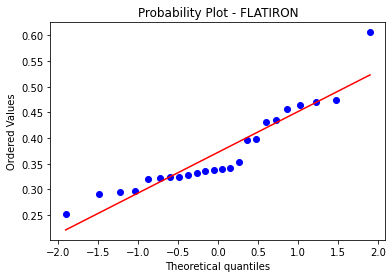

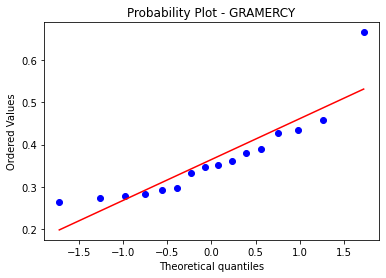

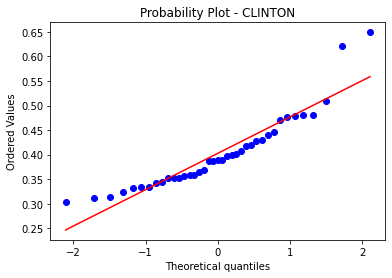

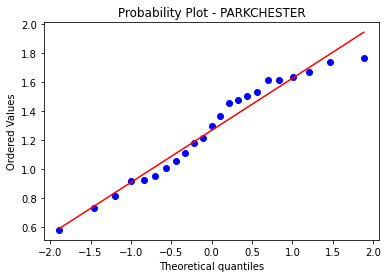

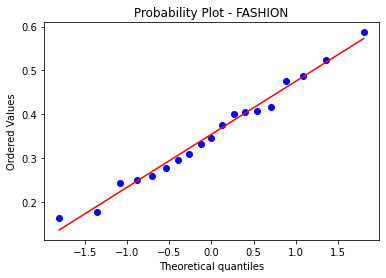

In [ ]:
from scipy import stats

for n in neighborhood:
    stats.probplot(df[df['Neighborhood'] == n]['Efficiency'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  n)
    plt.show()


In [ ]:
df['Median Efficiency'] = (df['Report Year'][df['Efficiency'] < 0.5] & df['Report Year'][df['Efficiency'] > 0.4])
df['High Efficiency'] = (df['Report Year'][df['Efficiency'] >= 0.5] & df['Report Year'][df['Efficiency'] < 2.0])
df['Low Efficiency'] = (df['Report Year'][df['Efficiency'] <= 0.4] & df['Report Year'][df['Efficiency'] > 0.0])

df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Efficency,Efficiency,Median Efficiency,High Efficiency,Low Efficiency
11,1-00016-7508,200 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,546,1987.0,586224,20136794,5229118.0,14907676,112553026.0,2012,0.350767,0.350767,False,False,True
714,1-01049-7501,1 CENTRAL PARK,MIDTOWN WEST,R4-CONDOMINIUM,165,1955.0,377444,15750738,4174531.0,11576207,87401005.0,2012,0.360613,0.360613,False,False,True
85,1-00142-7502,200 CHAMBERS STREET,TRIBECA,R4-CONDOMINIUM,311,2005.0,314373,13958161,3964244.0,9993917,75454001.0,2012,0.396666,0.396666,False,False,True
673,1-00936-7501,333 EAST 30 STREET,KIPS BAY,R4-CONDOMINIUM,1121,1962.0,1171064,31794388,11359321.0,20435067,154284996.0,2012,0.555874,0.555874,False,True,False
27,1-00027-7502,20 EXCHANGE PLACE,FINANCIAL,RR-CONDOMINIUM,350,1929.0,346789,13890120,3648220.0,10241900,80272000.0,2012,0.356205,0.356205,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19581,1-01331-7502,225 EAST 57 STREET,MIDTOWN EAST,R9 -CONDOPS,260,1964.0,305093,15474317,5879142.0,9595175,77918000.0,2019,0.612719,0.612719,False,True,False
19474,1-00890-7501,155 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,330,1961.0,270870,12934043,3811141.0,9122902,74091990.0,2019,0.417755,0.417755,True,False,False
20214,2-03929-7501,1469 WEST AVENUE,PARKCHESTER,R4 -ELEVATOR,2121,1933.0,1867373,27973248,15797976.0,12175272,86159983.0,2019,1.297546,1.297546,False,True,False
20191,1-01307-7502,100 EAST 53 STREET,MIDTOWN CBD,R4 -ELEVATOR,94,2014.0,294885,16575486,5470117.0,11105369,90192005.0,2019,0.492565,0.492565,True,False,False


In [ ]:
from scipy.stats import f_oneway


F, p = f_oneway(df['Report Year'][df['High Efficiency'] == True],
               df['Report Year'][df['Low Efficiency'] == True],
               df['Report Year'][df['Median Efficiency'] == True])
print(F)

print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

10.862435779165304
p-value for significance is:  2.1536102942275335e-05
reject null hypothesis


In [ ]:
tri = df.loc[df['Neighborhood'] == "TRIBECA", 'Efficiency'].values
mw = df.loc[df['Neighborhood'] == "MIDTOWN WEST", 'Efficiency'].values
kips = df.loc[df['Neighborhood'] == "KIPS BAY", 'Efficiency'].values
fin = df.loc[df['Neighborhood'] == "FINANCIAL", 'Efficiency'].values
ues = df.loc[df['Neighborhood'] == "UPPER EAST SIDE (59-79)", 'Efficiency'].values
uws = df.loc[df['Neighborhood'] == "UPPER WEST SIDE (59-79)", 'Efficiency'].values
mcbd = df.loc[df['Neighborhood'] == "MIDTOWN CBD", 'Efficiency'].values
ues2 = df.loc[df['Neighborhood'] == "UPPER EAST SIDE (79-96)", 'Efficiency'].values
uws2 = df.loc[df['Neighborhood'] == "UPPER WEST SIDE (79-96)", 'Efficiency'].values
hill = df.loc[df['Neighborhood'] == "MURRAY HILL", 'Efficiency'].values
chel = df.loc[df['Neighborhood'] == "CHELSEA", 'Efficiency'].values
flat = df.loc[df['Neighborhood'] == "FLATIRON", 'Efficiency'].values
gram = df.loc[df['Neighborhood'] == "GRAMERCY", 'Efficiency'].values
park = df.loc[df['Neighborhood'] == "PARKCHESTER", 'Efficiency'].values
fash = df.loc[df['Neighborhood'] == "FASHION", 'Efficiency'].values


In [ ]:
from scipy.stats import f_oneway

F, p = f_oneway(tri, mw, kips, fin, ues, uws, mcbd, ues2, uws2, hill, chel, flat, gram, park, fash)

print(F)

print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

88.59661353557807
p-value for significance is:  5.015907336805657e-152
reject null hypothesis
